In [2]:
import numpy as np
import os
import sys
import cv2 
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
pickle_out = open('x_data_np','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

In [5]:

X_Temp = open('x_data_np','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_np','rb')
y_data_np = pickle.load(Y_Temp)

In [6]:
x_data_np = x_data_np.reshape(-1, 50, 50, 1)

In [7]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.3,random_state=101)

In [8]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=x_data_np.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.fit(X_Train, Y_Train, batch_size=30, epochs=4, validation_split=0.3)
model.save('64x3CNN.model')

Epoch 1/4
5/5 [==============================] - 1s 270ms/step - loss: 0.1919 - accuracy: 0.9538 - val_loss: 0.5197 - val_accuracy: 0.7679
Epoch 2/4
5/5 [==============================] - 1s 288ms/step - loss: 0.1682 - accuracy: 0.9692 - val_loss: 0.5734 - val_accuracy: 0.7857
Epoch 3/4
5/5 [==============================] - 1s 288ms/step - loss: 0.1244 - accuracy: 0.9692 - val_loss: 1.1735 - val_accuracy: 0.6250
Epoch 4/4
5/5 [==============================] - 1s 279ms/step - loss: 0.1969 - accuracy: 0.9077 - val_loss: 0.7360 - val_accuracy: 0.6964
INFO:tensorflow:Assets written to: 64x3CNN.model\assets


In [29]:
preds = model.evaluate(X_Test, Y_Test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

3/3 [==============================] - 0s 53ms/step - loss: 0.3917 - accuracy: 0.8889
Loss = 0.3916577100753784
Test Accuracy = 0.8888888955116272


In [30]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

In [31]:
model = tf.keras.models.load_model('64x3CNN.model')

In [54]:
print("LET SEE WE CAN UPLOAD FROM USER ")

LET SEE WE CAN UPLOAD FROM USER 


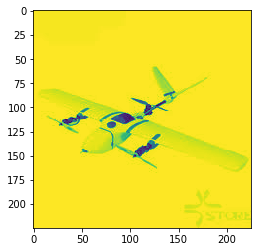

In [50]:
filepath = 'E:/Image/Fixed wing/1.jpg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array)



In [51]:
test = model.predict([prepare(filepath='E:/Image/Fixed wing/1.jpg')])

In [52]:
print(CATERGORIES[int(test[0][0])])

Fixed wing


In [53]:
print("THANK U")

THANK U
